In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from matplotlib.cm import ScalarMappable

In [2]:
# Generate a custom dataset
np.random.seed(0)
X = np.random.rand(100, 2)
y = (X[:, 0] + X[:, 1] > 1).astype(int)

In [3]:
# Create a logistic regression model
model = LogisticRegression()

In [4]:
# Fit the model to the data
model.fit(X, y)

LogisticRegression()

In [5]:
score = model.score(X, y)
print(f"Model Accuracy: {score:.2f}")

Model Accuracy: 0.97


In [6]:
# Predict probabilities for each point in the dataset
probs = model.predict_proba(X)[:, 1]

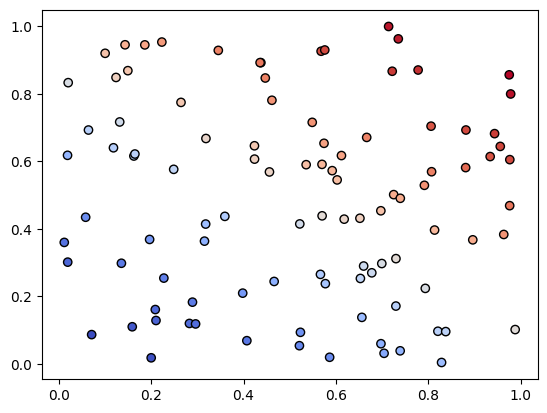

In [7]:
# Create a scatter plot of the data points
plt.scatter(X[:, 0], X[:, 1], c=probs, cmap='coolwarm', edgecolors='k')

<ipython-input-8-cadc71b6d5f3>:14: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


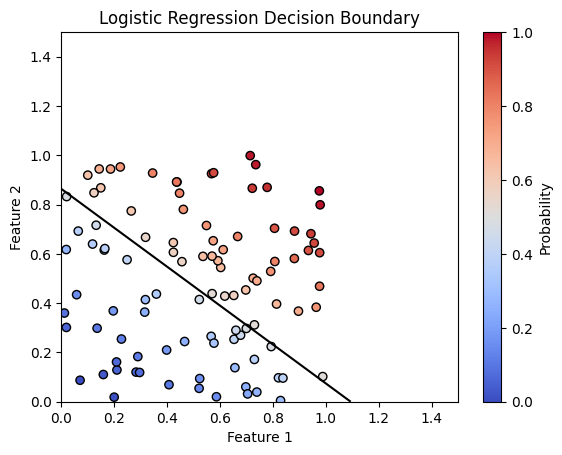

In [8]:
scatter = plt.scatter(X[:, 0], X[:, 1], c=probs, cmap='coolwarm', edgecolors='k')

# Plot the decision boundary
xx, yy = np.meshgrid(np.linspace(0, 1.5, 100), np.linspace(0, 1.5, 100))
Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0.5], colors='k')

# Create a ScalarMappable for colorbar
sm = ScalarMappable(cmap='coolwarm')
sm.set_array([])  # This line is crucial to avoid the RuntimeError

# Add colorbar
cbar = plt.colorbar(sm)
cbar.set_label('Probability')

# Set labels and show the plot
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.show()